In [40]:
import numpy as np
from scipy.io import arff
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from numpy import linalg as LA

np.set_printoptions(linewidth=120)

#### plot functions

In [41]:
def plot_eigen_values(eig_values):
    fig, ax = plt.subplots()
    fig.suptitle("Eigen values Plot")
    xvar = np.arange(1, eig_values.shape[0] + 1)

    ax.bar(xvar, eig_values, label="Eigen values")
    ax.set_xlabel("Number of components")
    ax.set_ylabel("Eigen value")

    ax2 = plt.twinx()
    ax2.plot(xvar, np.cumsum(eig_values / np.sum(eig_values)), color='red',
             label='Accum. Variability')
    ax2.set_ylim(0, 1)
    ax2.set_ylabel("% of variance explained")

    print "Explained variance ratio (comp, %) => {}".format(
        zip(xvar, (eig_values / np.sum(eig_values))))

    fig.legend()
    fig.show()

In [42]:
def plot_components(proj, evec, idx=[0, 1], var_labels=None, scale=True):
    assert len(idx) == 2, "Please select only 2 dimensions/components"

    proj_labels = ["PC{}".format(i+1) for i in idx]
    if not var_labels:
        var_labels = ["VAR{}".format(j + 1) for j in range(evec.shape[0])]

    if scale:
        proj = proj[:, idx]/np.ptp(proj[:, idx], axis=0)

    plt.figure()
    plt.title("PCA Biplot: individuals and variables")
    plt.grid(linestyle='--', linewidth=0.5)
    plt.axhline(0, color='darkgray')
    plt.axvline(0, color='darkgray')

    plt.scatter(proj[:, idx[0]], proj[:, idx[1]], s=2)
    plt.xlabel(proj_labels[0])
    plt.ylabel(proj_labels[1])
    # plt.xlim(-1, 1)
    # plt.ylim(-1, 1)

    for j, label in enumerate(var_labels):
        plt.arrow(0, 0, evec[j, idx[0]], evec[j, idx[1]], color='r', alpha=0.5)
        plt.text(evec[j, idx[0]] * 1.1, evec[j, idx[1]] * 1.1, label,
                 color='r', ha='center', va='center')

    plt.show()

In [43]:
def descriptive_stats(X,var_labels):
    # Descriptive statistics
    sep = "\t"
    print sep.join(["var", "Min.", "1st Qu.", "Median", "Mean", "Std.Dev", "3rd Qu.",
                    "Max."])
    for i in range(X.shape[1]):
        stats = [
            np.min(X[:, i]),
            np.percentile(X[:, i], 0.25),
            np.percentile(X[:, i], 0.5),
            np.mean(X[:, i]),
            np.std(X[:, i]),
            np.percentile(X[:, i], 0.75),
            np.max(X[:, i])
        ]
        print sep.join([var_labels[i]] + ["%.2f" %s for s in stats])


In [44]:
def plot_vars(var_labels, var_data, var_1, var_2):
    # Plot 2 original vars
    idx = [var_1, var_2]
    plt.figure()
    plt.title("Scatter plot: {} vs {}".format(var_labels[idx[1]], var_labels[idx[0]]))
    plt.grid(linestyle='--', linewidth=0.5)
    plt.scatter(var_data[:, idx[0]], var_data[:, idx[1]], s=2)
    plt.xlabel(var_labels[idx[0]])
    plt.ylabel(var_labels[idx[1]])
    plt.show()

In [45]:
def plot_correlation(X):
    # Correlation Visualization
    plt.matshow(np.corrcoef(X.transpose())-np.identity(X.shape[1]),
                cmap="RdBu", vmin=-1, vmax=1)
    plt.title("Correlation Matrix")
    plt.colorbar()
    plt.show()

### PCA implementation

In [46]:
def iml_pca(x_data,x_labels):

    #calculate the mean of each feature
    means_array = np.mean(x_data, axis=0)
    vars_array = np.var(x_data, axis=0)
    print means_array
    print vars_array
    #Substract the mean of the feature to each feature value
    pca_data=x_data-means_array

    #print ("values after substracting the mean")
    #plot_vars(x_labels, pca_data, 2, 3)
    #plot_vars(x_labels, pca_data, 2, 4)
    #plot_vars(x_labels, pca_data, 3, 4)

    #print ("Correlation matrix")
    plot_correlation(pca_data)
    
    #Calculate covariance matrix
    covars_matrix = np.cov(pca_data,rowvar=0)
    print ("Covar matrix")
    print covars_matrix
    
    
    #Calculate the eigenvectors and eigenvalues
    w, v = LA.eig(covars_matrix)
    #print "Eigenvalues:"
    #print w
    #print "Eigenvectors:"
    #print v

    #Sort the eigenvectors and eigenvalues
    idx = w.argsort()[::-1]
    eigenValues = w[idx]
    eigenVectors = v[:,idx]

    print "Eigenvalues:"
    print eigenValues
    print "Eigenvectors:"
    print eigenVectors
    
    plot_eigen_values(eigenValues)
    #How to chose k?

    for k in range(1,len(eigenVectors)):
        if (np.sum(eigenValues[0:k])/np.sum(eigenValues)) > 0.9:
            break

    print ("K value is:")
    print k

    kEigenVectors=eigenVectors[:,0:k]
    kEigenValues=eigenValues[0:k]

    #print ("Eigen vectors (k)")
    #print kEigenVectors
    #print ("Eigen values (k)")
    #print kEigenValues

    #derive new data set
    newDataSet=np.dot(kEigenVectors.transpose(),pca_data.transpose())

    newDataSet=newDataSet.transpose()
    
    #print ("New Data")
    #print newDataSet.shape
    
    plot_vars(["PC1","PC2"], newDataSet, 0, 1)
    plot_vars(["PC1","PC2","PC3"], newDataSet, 1, 2)

    vars_pcs = np.var(newDataSet.transpose(), axis=0)
    
    #reconstruction
    dataRecover=np.dot(kEigenVectors,newDataSet.transpose())

    print ("Data reconstructed")
    plot_vars(data_labels, dataRecover.transpose(), 2, 3)
    plot_vars(data_labels, dataRecover.transpose(), 2, 4)
    plot_vars(data_labels, dataRecover.transpose(), 3, 4)

#### Bupa Dataset

var	Min.	1st Qu.	Median	Mean	Std.Dev	3rd Qu.	Max.
MCV	65.00	76.18	78.72	90.16	4.44	79.00	103.00
alkphos	23.00	33.32	35.72	69.87	18.32	36.58	138.00
sgpt	4.00	4.86	7.88	30.41	19.48	9.00	155.00
sgot	5.00	7.58	8.00	24.64	10.05	9.74	82.00
gammagt	5.00	5.00	5.00	38.28	39.20	5.58	297.00
drinks	0.00	0.00	0.00	3.46	3.33	0.00	20.00


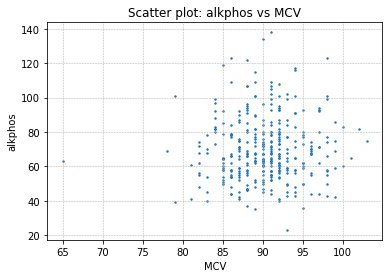

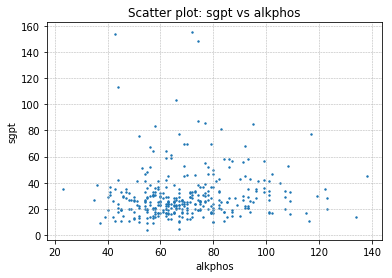

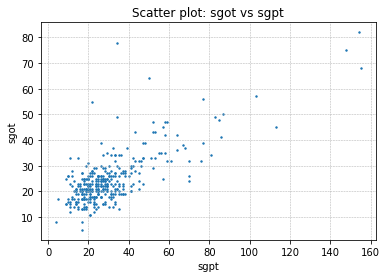

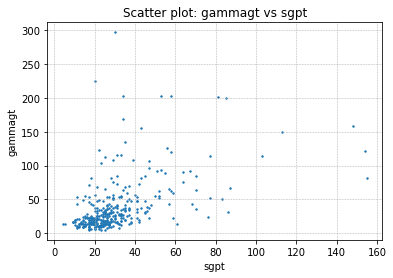

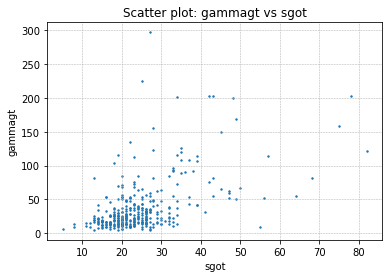

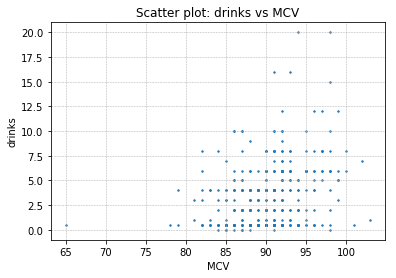

[ 90.15942029  69.86956522  30.4057971   24.64347826  38.28405797   3.45507246]
[   19.72820836   335.66124764   379.62663306   101.00042848  1536.4584415     11.10885108]


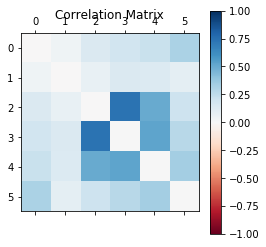

Covar matrix
[[   19.7855578      3.59934277    12.81884058     8.40583923    38.81795585     4.6423576 ]
 [    3.59934277   336.63700708    27.28273509    26.97080384    95.89180991     6.17290192]
 [   12.81884058    27.28273509   380.73019885   145.25846815   385.60532524    13.47177283]
 [    8.40583923    26.97080384   145.25846815   101.29403438   208.45331143     9.39236603]
 [   38.81795585    95.89180991   385.60532524   208.45331143  1540.92489046    44.70902005]
 [    4.6423576      6.17290192    13.47177283     9.39236603    44.70902005    11.14114425]]
Eigenvalues:
[ 1704.23455772   329.48615401   290.92117087    37.76391713    19.59323592     8.51379717]
Eigenvectors:
[[  2.48915066e-02   1.98561179e-03   4.94442234e-03   1.08533543e-01  -9.43765959e-01   3.11252804e-01]
 [  7.49485205e-02   9.95571826e-01  -3.81810281e-02  -4.14076557e-02   1.32930005e-03   6.73102408e-03]
 [  2.92623798e-01  -2.31264856e-03   8.89478140e-01  -3.49274184e-01  -3.21086702e-02  -1.30836279

TypeError: legend() takes at least 3 arguments (1 given)

In [47]:
f = "datasets/bupa.arff"
data, meta = arff.loadarff(f)

#print meta

data_num = np.zeros((len(data), 6))
data_labels = ["MCV","alkphos","sgpt","sgot","gammagt","drinks"]


i = 0
for d in data:
    data_num[i, :] = [d[0], d[1], d[2], d[3],d[4], d[5]]
    i += 1

descriptive_stats(data_num, data_labels)

plot_vars(data_labels, data_num, 0, 1)
plot_vars(data_labels, data_num, 1, 2)
plot_vars(data_labels, data_num, 2, 3)
plot_vars(data_labels, data_num, 2, 4)
plot_vars(data_labels, data_num, 3, 4)
plot_vars(data_labels, data_num, 0, 5)


iml_pca(data_num,data_labels)



[[  2.30070888e+01   3.69557974e+00   1.34349332e+01   6.74572130e+00   3.89027382e+01   1.19311082e+00]
 [  3.69557974e+00   3.36610518e+02   2.70528405e+01   2.75809890e+01   9.58661875e+01   6.14448521e+00]
 [  1.34349332e+01   2.70528405e+01   3.78806610e+02   1.50344254e+02   3.85372043e+02   1.41539601e+01]
 [  6.74572130e+00   2.75809890e+01   1.50344254e+02   8.78558927e+01   2.09076731e+02   7.34592130e+00]
 [  3.89027382e+01   9.58661875e+01   3.85372043e+02   2.09076731e+02   1.54090237e+03   4.45502553e+01]
 [  1.19311082e+00   6.14448521e+00   1.41539601e+01   7.34592130e+00   4.45502553e+01   2.33303555e+01]]
[ 1704.23455772   329.48615401   290.92117087]


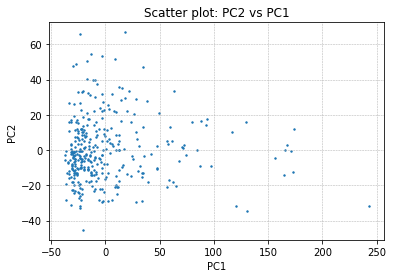

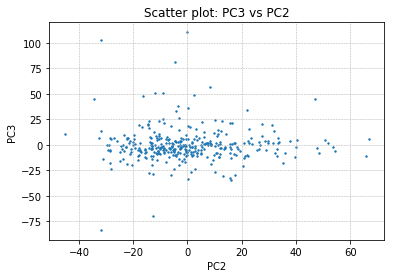

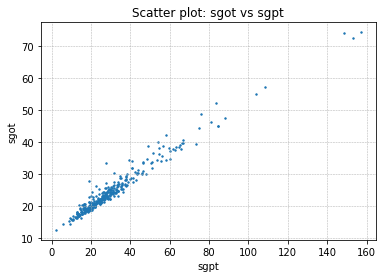

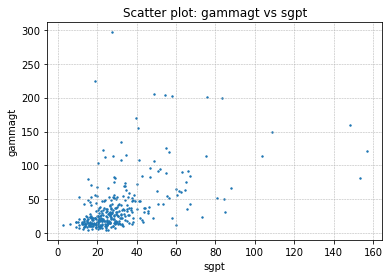

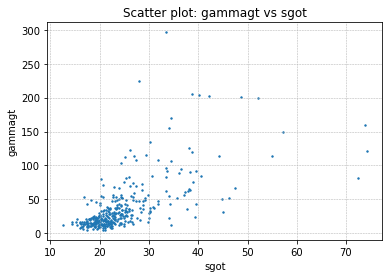

In [30]:
#Comapring with sklearn pca

pca = PCA(n_components=3)

newPCAData=pca.fit_transform(data_num)


covar=pca.get_covariance()
print covar

eigenvalues_sk = pca.explained_variance_
print eigenvalues_sk


recoverdata=pca.inverse_transform(newPCAData)


plot_vars(["PC1","PC2"], newPCAData, 0, 1)
plot_vars(["PC1","PC2","PC3"], newPCAData, 1, 2)
plot_vars(data_labels, recoverdata, 2, 3)
plot_vars(data_labels, recoverdata, 2, 4)
plot_vars(data_labels, recoverdata, 3, 4)
